# Capstone Analytic Report and Research Proposal

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import ttest_ind

In [2]:
census = pd.read_csv('HR-Employee-Attrition.csv')

In [3]:
census_yes = pd.read_csv('HR-Employee-Attrition-Yes.csv')

In [4]:
census_no = pd.read_csv('HR-Employee-Attrition-No.csv')

In [5]:
census.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
census_no.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.000000,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,...,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,8.915653,2.927007,1.0,1027.656123,2.771290,65.952149,2.770479,2.145985,2.778589,...,2.733982,80.0,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,8.012633,1.027002,0.0,606.217074,1.071132,20.380754,0.692050,1.117933,1.093277,...,1.071603,0.0,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,1.000000,1.000000,1.0,2.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,2.000000,2.000000,1.0,483.000000,2.000000,48.000000,2.000000,1.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,1.0,1022.000000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,13.000000,4.000000,1.0,1574.000000,4.000000,83.000000,3.000000,3.000000,4.000000,...,4.000000,80.0,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,80.0,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


In [7]:
census_yes.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.000000,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,...,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,10.632911,2.839662,1.0,1010.345992,2.464135,65.573840,2.518987,1.637131,2.468354,...,2.599156,80.0,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,8.452525,1.008244,0.0,580.750572,1.169791,20.099958,0.773405,0.940594,1.118058,...,1.125437,0.0,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,3.000000,2.000000,1.0,514.000000,1.000000,50.000000,2.000000,1.000000,1.000000,...,2.000000,80.0,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,9.000000,3.000000,1.0,1017.000000,3.000000,66.000000,3.000000,1.000000,3.000000,...,3.000000,80.0,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,17.000000,4.000000,1.0,1486.000000,4.000000,84.000000,3.000000,2.000000,3.000000,...,4.000000,80.0,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,29.000000,5.000000,1.0,2055.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [8]:
df = pd.read_csv('YearlyAttritionCount.csv')

In [9]:
df = df.drop(["Count", "Grand Total"], axis = 1)

In [10]:
df

,0,1,2,3,4,5,6,7,8,9,...,27,29,30,31,32,33,34,36,37,40
0,28.00,112.00,100.00,108.00,91.00,175.00,67.00,79.00,71.00,74.00,...,2.00,2.00,1.00,2.00,2.00,4.00,1.00,2.00,1.00,0.00
1,16.00,59.00,27.00,20.00,19.00,21.00,9.00,11.00,9.00,8.00,...,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,1.00
2,44.00,171.00,127.00,128.00,110.00,196.00,76.00,90.00,80.00,82.00,...,2.00,2.00,1.00,3.00,3.00,5.00,1.00,2.00,1.00,1.00
3,0.02,0.10,0.16,0.24,0.30,0.42,0.46,0.52,0.57,0.62,...,0.83,0.83,0.83,0.83,0.83,0.84,0.84,0.84,0.84,0.84
4,0.02,0.08,0.07,0.07,0.06,0.12,0.05,0.05,0.05,0.05,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0.98,0.91,0.84,0.76,0.70,0.58,0.54,0.48,0.44,0.38,...,0.17,0.17,0.17,0.17,0.17,0.16,0.16,0.16,0.16,0.16


In [13]:
census_no.mean() - census_yes.mean()

Age                            3.953638
DistanceFromHome              -1.717259
Education                      0.087345
EmployeeCount                  0.000000
EmployeeNumber                17.310132
EnvironmentSatisfaction        0.307155
HourlyRate                     0.378310
JobInvolvement                 0.251491
JobLevel                       0.508855
JobSatisfaction                0.310234
MonthlyIncome               2045.646832
MonthlyRate                 -293.528617
NumCompaniesWorked            -0.295348
PercentSalaryHike              0.134097
PerformanceRating             -0.002833
RelationshipSatisfaction       0.134826
StandardHours                  0.000000
StockOptionLevel               0.317667
TotalWorkingYears              3.618210
TrainingTimesLastYear          0.208455
WorkLifeBalance                0.122794
YearsAtCompany                 2.238217
YearsInCurrentRole             1.581231
YearsSinceLastPromotion        0.289240
YearsWithCurrManager           1.515076


## 1. Describe your dataset

This data set is an HR file that focuses on employee attrition. It includes data that appears to be an aggregation of a survey along with known factors (gender, education, time with company, etc). There are an awful lot of potential factors that *may* contribute to attrition, the summary data above is a good start in determining what to explore, however has attrition is qualitive my first thought is to divide by attrition and determine what variables are equal between the two populations and which are not. After looking at the subsets between employees that have left (attrition = "yes) and not, a few things are quickly clear. 

    - Many more employees have stayed then left
    - The average age, environmental satisfaction, job satisfaction, relationship satisfaction, hourly rate, stock option, job level, total working years, years at company, years in current role, and years with current manager for those who have left are less than those who have not.
    
What is interesting is that all of these *could* be a significant factor, and possibly some of them are only a factor when paired with another variable. I suspect this could be a good thing to explore further into the course.
    

## 2. Ask and answer analytic questions

### a) Is monthly income a factor in attrition?

Looking at the means between the 2 populations, you see a very large difference between the population means for monthly income. Let's explore this further.

Text(0.5,1,'Monthly Income - 1470')

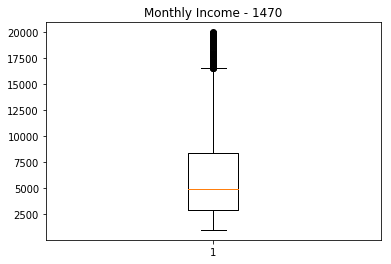

In [20]:
plt.boxplot(census['MonthlyIncome'])
plt.title("Monthly Income - " + str(len(census['MonthlyIncome'] )))

From looking at the data and the above boxplot my suspicion is that there are very high earners who are much less likely to leave the company.

Text(0.5,1,'Monthly Income - 1233')

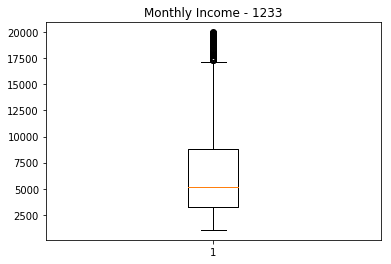

In [35]:
plt.boxplot(census_no['MonthlyIncome'])
plt.title("Monthly Income - " + str(len(census_no['MonthlyIncome'] )))

Text(0.5,1,'Monthly Income - 237')

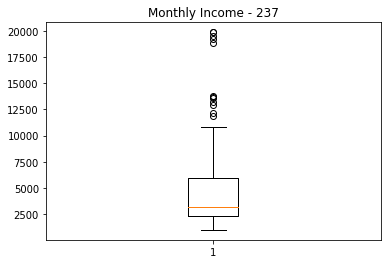

In [36]:
plt.boxplot(census_yes['MonthlyIncome'])
plt.title("Monthly Income - " + str(len(census_yes['MonthlyIncome'] )))

The boxplot for employees that have left is revealing, the mean and overall income for these employees is much less, and the high earners that did leave were in fact outliers. Time to definitely deterimine if these population differences are simply due to chance or statistically significant.

In [37]:
print(ttest_ind(census_yes['MonthlyIncome'], census_no['MonthlyIncome'], equal_var=False))

Ttest_indResult(statistic=-7.482621586644742, pvalue=4.433588628286071e-13)


Given this p-value, we do  reject the null hypothesis that the difference in attrition rates between the two populations are equal. I was concerned that there could be a outliers affecting the results, however the box plot shows while the data is skewed it should be useable as is. Monthly income is a factor in attrition rate.

### b) Does age of the employee play a statistically signifcant factor in determining whether an employee is likely to stay or not, independent of all other factors?


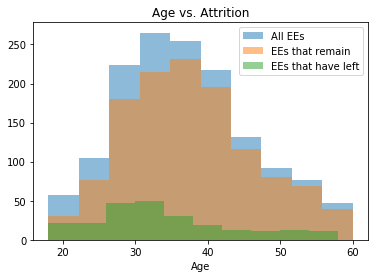

In [39]:

plt.hist(census['Age'], alpha=0.5, label='All EEs') 
plt.hist(census_no['Age'], alpha=0.5, label='EEs that remain') 
plt.hist(census_yes['Age'], alpha=0.5, label='EEs that have left') 
plt.legend(loc='upper right') 
plt.title("Age vs. Attrition")
plt.xlabel("Age")
plt.show()

This historgram does seem to show that the populations differ, at least visually. The population that has left does seem to skew younger while the population that has stayed with the company seems to skew older than the total population. Lets see if it is a significant difference.

In [40]:
print(ttest_ind(census_yes['Age'], census_no['Age'], equal_var=False))

Ttest_indResult(statistic=-5.828011853988949, pvalue=1.3797600649439775e-08)


Given this p-value, I am able to reject the null hypothesis that the means are the same since there is more a less than a 5% probability between the two populations is due to random chance - the number is actually much smaller in this case.  Age is a statistically significant factor in this company's attrition.

### c) Does the distance from home play a factor in employee retention?

In [41]:
print(ttest_ind(census_yes['DistanceFromHome'], census_no['DistanceFromHome'], equal_var=False))

Ttest_indResult(statistic=2.888183062817627, pvalue=0.004136511971511406)


Text(0.5,1,'Distance from home - 1470')

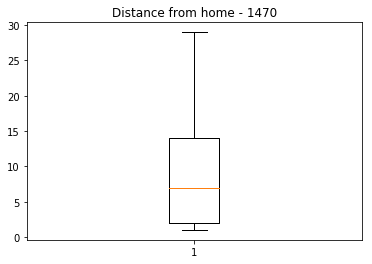

In [42]:
plt.boxplot(census['DistanceFromHome'])
plt.title("Distance from home - " + str(len(census['DistanceFromHome'] )))

This p-value is less than 0.025 therefore I reject the null hypothesis that the means are the same and that the difference between the two populations is due to chance. Looking at the boxplot for distance from home, while skewed upwars there are no outliers that need to be considered to be removed from the analysis. An employee's distance from home is a factor in attrition.

## d) Is time with the company a significant indicator of liklihood of leaving?

<Figure size 1440x720 with 0 Axes>

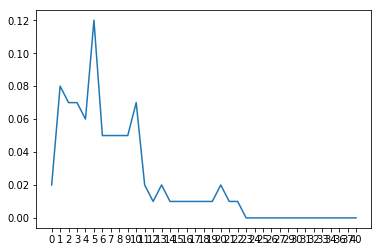

<Figure size 1440x720 with 0 Axes>

In [43]:
plt.plot(df.iloc[4])
plt.figure(figsize=(20,10))

Attrition by year is very revealing, it's fairly high for the first ten years then reduces to close to 0 - if the company can retain an employee for 10 years they are very likely to remain for their career. Percentage wise attrition peaks in an employees 5th year at 12%, about 1 in 8 employees that make it to their fifth year will not make it beyond. 

Text(0,0.5,'Attrition %')

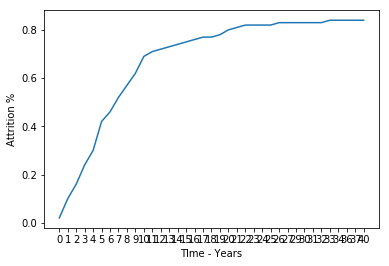

In [48]:
plt.plot((df.iloc[3]))
plt.xlabel("TIme - Years")
plt.ylabel("Attrition %")

Attrition as a function of time is over 50% by the 8th year - an employee is more likely to be gone then not by their 8th year. This should be taken in consideration in how much to invest in each employee.

## 3. Propose further research

Clearly many of these variables play a factor in employee attrition. For further research there are a few routes I'd be interested in exploring. First of all I would like to figure out how to create a function that quickly runs the t-test function between all qualitive variables immediately so I can quickly determine which of the 20+ variables to dive further into. Additionally I suspect that some of the variables are related, for instance difference in pay within departments I would be very interested to know if that provides additional insight. I would really like to be able to complete these items without resorting to Excel as I did initially to seperate the "No" and "Yes" attrition populations. As mentioned earlier I hope to tackle these types of questions further along in the course.